# Predicting customer churn in Netflix [PREPROCESSING]

## Initial Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data 

In [5]:
df = pd.read_csv('C:/Users/RANA/Netflix-customer-churn-classifier/data/netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

## Organizing data & dropping unnecessary columns

In [8]:
# drop customer_id
df = df.drop('customer_id', axis = 1)

# checking for subscription_type & monthly_fee collinearity in case one needs to be dropped
print("Subscription types:", df['subscription_type'].unique())
df.groupby('subscription_type')['monthly_fee'].describe()

Subscription types: ['Basic' 'Standard' 'Premium']


,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
Basic,1661.0,8.99,1.865736e-13,8.99,8.99,8.99,8.99,8.99
Premium,1693.0,17.99,6.396774e-13,17.99,17.99,17.99,17.99,17.99
Standard,1646.0,13.99,3.269490e-13,13.99,13.99,13.99,13.99,13.99


In [9]:
# drop monthly_fee 
df = df.drop('monthly_fee' , axis = 1)

df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,1,Crypto,2,0.13,Action


In [10]:
# checking collinearity of watch_hours & avg_watch_time_per_day
print("Correlation:", df['watch_hours'].corr(df['avg_watch_time_per_day']))
df['calculated_daily_avg'] = df['watch_hours'] / 30  
comparison = df[['avg_watch_time_per_day', 'calculated_daily_avg']].head(10)

Correlation: 0.3497417412240324


In [11]:
# rearranging columns
df_unordered = df.copy()
new_column_order = ['age', 'gender', 'region', 'device', 'favorite_genre', 'number_of_profiles', 'watch_hours', 'avg_watch_time_per_day', 
                    'last_login_days', 'payment_method', 'subscription_type', 'churned']
df = df[new_column_order]

df.head()

,age,gender,region,device,favorite_genre,number_of_profiles,watch_hours,avg_watch_time_per_day,last_login_days,payment_method,subscription_type,churned
0,51,Other,Africa,TV,Action,1,14.73,0.49,29,Gift Card,Basic,1
1,47,Other,Europe,Mobile,Sci-Fi,5,0.70,0.03,19,Gift Card,Standard,1
2,27,Female,Asia,TV,Drama,2,16.32,1.48,10,Crypto,Standard,0
3,53,Other,Oceania,TV,Horror,2,4.51,0.35,12,Crypto,Premium,1
4,56,Other,Africa,Mobile,Action,2,1.89,0.13,13,Crypto,Standard,1


## Checking for invalid values

### Numerical invalidity check

In [14]:
df.describe()

,age,number_of_profiles,watch_hours,avg_watch_time_per_day,last_login_days,churned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,3.024400,11.649450,0.874800,30.089800,0.503000
std,15.501128,1.415841,12.014654,2.619824,17.536078,0.500041
min,18.000000,1.000000,0.010000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,3.337500,0.110000,15.000000,0.000000
50%,44.000000,3.000000,8.000000,0.290000,30.000000,1.000000
75%,58.000000,4.000000,16.030000,0.720000,45.000000,1.000000
max,70.000000,5.000000,110.400000,98.420000,60.000000,1.000000


In [15]:
# avg_watch_time_per_day max = 98.42 (impossible)
print("Customers watching >24 hours/day:")
print(df[df['avg_watch_time_per_day'] > 24].shape[0])

# watch_hours max = 110.40 (not impossible but worth checking)
extreme_watchers = df[df['avg_watch_time_per_day'] > 24]
print(extreme_watchers[['watch_hours', 'avg_watch_time_per_day']].describe())

Customers watching >24 hours/day:
10
       watch_hours  avg_watch_time_per_day
count    10.000000               10.000000
mean     41.631000               38.905000
std      22.413805               22.328237
min      25.150000               25.150000
25%      28.882500               27.617500
50%      32.845000               31.180000
75%      48.232500               34.117500
max      98.420000               98.420000


In [16]:
# we can infer that for 10 customers, watch_hours was incorrectly labeled as avg_watch_time_per_day
# remedy: for these 10 customers (extreme_watchers), avg_watch_time_per_day will be imputed using watch_hours/30 (assuming 30-day month)
imputed_daily = df['watch_hours'] / 30
df.loc[df['avg_watch_time_per_day'] > 24, 'avg_watch_time_per_day'] = imputed_daily

df.describe()

,age,number_of_profiles,watch_hours,avg_watch_time_per_day,last_login_days,churned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,3.024400,11.649450,0.799765,30.089800,0.503000
std,15.501128,1.415841,12.014654,1.751753,17.536078,0.500041
min,18.000000,1.000000,0.010000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,3.337500,0.110000,15.000000,0.000000
50%,44.000000,3.000000,8.000000,0.290000,30.000000,1.000000
75%,58.000000,4.000000,16.030000,0.720000,45.000000,1.000000
max,70.000000,5.000000,110.400000,22.910000,60.000000,1.000000


In [17]:
# checking for churned invalid values
df['churned'].unique()

array([1, 0], dtype=int64)

### Categorical invalidity check

In [19]:
df['gender'].unique()

array(['Other', 'Female', 'Male'], dtype=object)

In [20]:
df['region'].unique()

array(['Africa', 'Europe', 'Asia', 'Oceania', 'South America',
       'North America'], dtype=object)

In [21]:
df['device'].unique()

array(['TV', 'Mobile', 'Laptop', 'Desktop', 'Tablet'], dtype=object)

In [22]:
df['favorite_genre'].unique()

array(['Action', 'Sci-Fi', 'Drama', 'Horror', 'Romance', 'Comedy',
       'Documentary'], dtype=object)

In [23]:
df['subscription_type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [24]:
df['payment_method'].unique()

array(['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card'],
      dtype=object)

## Checking for class imbalance in 'churned'

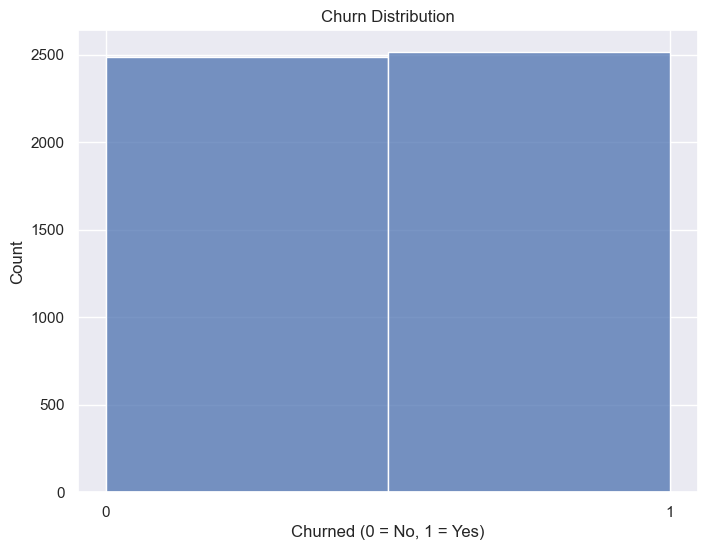

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='churned', bins=2)
plt.title('Churn Distribution')
plt.xlabel('Churned (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

## Feature engineering

### Create 'activity_status' column

In [29]:
# Based on business logic - how recently did they engage?
df['activity_status'] = pd.cut(df['last_login_days'], 
                             bins=[-1, 7, 30, 60],
                             labels=['active', 'dormant', 'inactive'])

print(df.groupby('activity_status', observed = False)['churned'].mean())

activity_status
active      0.133846
dormant     0.305157
inactive    0.750911
Name: churned, dtype: float64


In [30]:
df = df.drop('last_login_days', axis = 1)

In [31]:
new_column_order = ['age', 'gender', 'region', 'device', 'favorite_genre', 'number_of_profiles', 'watch_hours', 'avg_watch_time_per_day', 
                    'activity_status', 'payment_method', 'subscription_type', 'churned']
df = df[new_column_order]

df.head()

,age,gender,region,device,favorite_genre,number_of_profiles,watch_hours,avg_watch_time_per_day,activity_status,payment_method,subscription_type,churned
0,51,Other,Africa,TV,Action,1,14.73,0.49,dormant,Gift Card,Basic,1
1,47,Other,Europe,Mobile,Sci-Fi,5,0.70,0.03,dormant,Gift Card,Standard,1
2,27,Female,Asia,TV,Drama,2,16.32,1.48,dormant,Crypto,Standard,0
3,53,Other,Oceania,TV,Horror,2,4.51,0.35,dormant,Crypto,Premium,1
4,56,Other,Africa,Mobile,Action,2,1.89,0.13,dormant,Crypto,Standard,1


### Create 'usage_rate' column

In [33]:
df['usage_rate'] = pd.qcut(df['watch_hours'], q=3, labels=['light', 'medium', 'heavy'])
print(df.groupby('usage_rate', observed = False)['churned'].mean())

usage_rate
light     0.844031
medium    0.461031
heavy     0.203604
Name: churned, dtype: float64


In [34]:
df = df.drop('watch_hours', axis = 1)

new_column_order = ['age', 'gender', 'region', 'device', 'favorite_genre', 'number_of_profiles', 'usage_rate', 'avg_watch_time_per_day', 
                    'activity_status', 'payment_method', 'subscription_type', 'churned']
df = df[new_column_order]

df.head()

,age,gender,region,device,favorite_genre,number_of_profiles,usage_rate,avg_watch_time_per_day,activity_status,payment_method,subscription_type,churned
0,51,Other,Africa,TV,Action,1,heavy,0.49,dormant,Gift Card,Basic,1
1,47,Other,Europe,Mobile,Sci-Fi,5,light,0.03,dormant,Gift Card,Standard,1
2,27,Female,Asia,TV,Drama,2,heavy,1.48,dormant,Crypto,Standard,0
3,53,Other,Oceania,TV,Horror,2,light,0.35,dormant,Crypto,Premium,1
4,56,Other,Africa,Mobile,Action,2,light,0.13,dormant,Crypto,Standard,1


## Encoding categorical columns

In [36]:
one_hot_columns = ['gender', 'region', 'device', 'favorite_genre', 'payment_method', 'subscription_type']
df_encoded = pd.get_dummies(df, columns = one_hot_columns, drop_first = True)

df_encoded.head()

,age,number_of_profiles,usage_rate,avg_watch_time_per_day,activity_status,churned,gender_Male,gender_Other,region_Asia,region_Europe,...,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,subscription_type_Premium,subscription_type_Standard
0,51,1,heavy,0.49,dormant,1,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,47,5,light,0.03,dormant,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,27,2,heavy,1.48,dormant,0,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
3,53,2,light,0.35,dormant,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
4,56,2,light,0.13,dormant,1,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [37]:
# map True/False to 1/0
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# label encoding the remaining text columns (usage_rate, activity_status)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded['usage_rate'] = le.fit_transform(df_encoded['usage_rate'])
df_encoded['activity_status'] = le.fit_transform(df_encoded['activity_status'])

df_encoded.head()

,age,number_of_profiles,usage_rate,avg_watch_time_per_day,activity_status,churned,gender_Male,gender_Other,region_Asia,region_Europe,...,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi,payment_method_Crypto,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,subscription_type_Premium,subscription_type_Standard
0,51,1,0,0.49,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47,5,1,0.03,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,27,2,0,1.48,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,53,2,1,0.35,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,56,2,1,0.13,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


## Exporting preprocessed csv 

In [65]:
df_encoded.to_csv('C:/Users/RANA/Netflix-customer-churn-classifier/data/netflix_customer_churn_preprocessed.csv', index=False)